# I. Part I - Interview Just Analytic

In [2]:
import re

In [8]:
def validate(username):
    print(username)
    if len(username) < 4:
        return False
    pattern = r"^[a-zA-Z]+\w*[a-zA-Z]+$"
    regex = re.compile(pattern)
    result = regex.match(username)
    print(result)
    return (result is not None)

print(validate("Mike_Standish")) #Valid username
print(validate("Mike Standish")) #Invalid username
print(validate("abc"))

Mike_Standish
<_sre.SRE_Match object; span=(0, 13), match='Mike_Standish'>
True
Mike Standish
None
False
abc
False


In [44]:
class MovingTotal:
    lsNum = list()
    lsSum = list() # Sorted list of sum

    def append(self, numbers):
        """
        :param numbers: (list) The list of numbers.
        """
        if len(numbers) == 0:
            # Doing nothing
            return 0
        prevLen = len(self.lsNum)
        self.lsNum.extend(numbers)
        print(self.lsNum)
        curLen = len(self.lsNum)
        # if prevLen < 3 and curLen >= 3:
        #     # Calculate movingSum for all
        #     for i in range(curLen-2):
        #         self.lsSum.add(sum(self.lsNum[i: i+3]))
        # elif prevLen >= 3:
        # Calculate movingSum for new items
        if curLen >= 3:
            for i in range(prevLen, curLen):
                sumItem = sum(self.lsNum[i-2: i+1])
                found, idx = self.search(sumItem)
                print(f"{sumItem} - {found} - {idx}")
                if not found:
                    if idx == -1:
                        self.lsSum.append(sumItem)
                    elif sumItem < self.lsSum[idx]:
                        self.lsSum.insert(idx, sumItem)
                    else:
                        self.lsSum.insert(idx+1, sumItem)
                    print(self.lsSum)
        else:
            print("Not enough data")
        print("-"*5)
        return 0
    
    def search(self, x):
        # Binary search for total
        n = len(self.lsSum)
        if n == 0:
            return (False, -1)
        k = n / 2
        low = 0
        high = n - 1
        mid = 0
        while low <= high:
            mid = (low+high)//2
            if self.lsSum[mid] < x:
                low = mid + 1
            elif x < self.lsSum[mid]:
                high = mid - 1
            else:
                return (True, mid) # Found, Index of the value
        return (False, mid) # Not found, index of the nearest

    def contains(self, total):
        """
        :param total: (int) The total to check for.
        :returns: (bool) If MovingTotal contains the total.
        """
        
        return self.search(total)[0]

In [45]:
movingtotal = MovingTotal()

movingtotal.append([1, 2])
print(movingtotal.contains(6))
print(movingtotal.contains(9))
print(movingtotal.contains(12))
print(movingtotal.contains(7))

movingtotal.append([1, 2, 3, 4])
print(movingtotal.contains(6))
print(movingtotal.contains(9))
print(movingtotal.contains(12))
print(movingtotal.contains(7))

movingtotal.append([5])
print(movingtotal.contains(6))
print(movingtotal.contains(9))
print(movingtotal.contains(12))
print(movingtotal.contains(7))

movingtotal.append([1, 2, 3, 4])
print(movingtotal.contains(6))
print(movingtotal.contains(9))
print(movingtotal.contains(12))
print(movingtotal.contains(7))

[1, 2]
Not enough data
-----
False
False
False
False
[1, 2, 1, 2, 3, 4]
4 - False - -1
[4]
5 - False - 0
[4, 5]
6 - False - 1
[4, 5, 6]
9 - False - 2
[4, 5, 6, 9]
-----
True
True
False
False
[1, 2, 1, 2, 3, 4, 5]
12 - False - 3
[4, 5, 6, 9, 12]
-----
True
True
True
False
[1, 2, 1, 2, 3, 4, 5, 1, 2, 3, 4]
10 - False - 4
[4, 5, 6, 9, 10, 12]
8 - False - 3
[4, 5, 6, 8, 9, 10, 12]
6 - True - 2
9 - True - 4
-----
True
True
True
False


In [20]:
[i for i in range(4, 5)]

[4]

In [50]:
from collections import namedtuple

def merge(*records):
    """
    :param records: (varargs list of namedtuple) The patient details.
    :returns: (namedtuple) named Patient, containing details from all records, in entry order.
    """ 
    lsField = []
    for t in records:
        lsField.extend(t._fields)
    print(lsField)
    Patient = namedtuple("Patient", lsField, defaults=(None,) * len(lsField))
    patient = Patient()
    for t in records:
        for f in t._fields:
            patient[f] = t[f]
    return patient
    
PersonalDetails = namedtuple('PersonalDetails', ['date_of_birth'])
personal_details = PersonalDetails(date_of_birth = '06-04-1972')
                                   
Complexion = namedtuple('Complexion', ['eye_color', 'hair_color'])
complexion = Complexion(eye_color = 'Blue', hair_color = 'Black')
  
print(merge(personal_details, complexion))

['date_of_birth', 'eye_color', 'hair_color']


TypeError: namedtuple() got an unexpected keyword argument 'defaults'

# II. Part II - Practice

## A. DL Models for Univariate Time Series Forecasting

### Source: 
<a href="https://machinelearningmastery.com/how-to-develop-deep-learning-models-for-univariate-time-series-forecasting/"> Deep learning Models for Time Series </a>
- Data: monthly-car-sales.csv


In [6]:
import pandas as pd, numpy as np
import sys, os
from datetime import datetime, timedelta
import math
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
def print_runtime():
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
    print("-"*19)
print_runtime()

2021-06-22 17:20:32
-------------------


In [4]:
# load data
data_path = "./data/monthly-car-sales.csv"
series = pd.read_csv(data_path, header=0, index_col=0)
print(series.shape)
print_runtime()

(108, 1)
2021-06-22 17:20:45
-------------------


In [8]:
display(series.head())
print_runtime()

,Sales
Month,
1960-01,6550
1960-02,8728
1960-03,12026
1960-04,14395
1960-05,14587


2021-06-22 17:25:54
-------------------


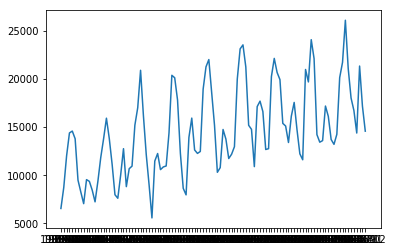

In [7]:
plt.plot(series)
plt.show()

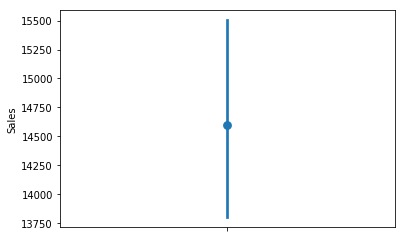

In [10]:
sns.pointplot(y="Sales", data=series)